In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [59]:
r = sts.laplace.rvs(size=1000)

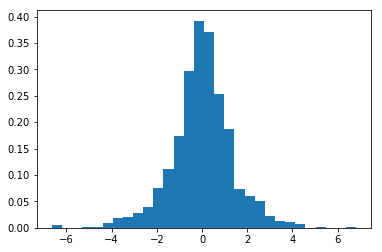

In [60]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, normed=True, histtype='bar',bins=30)
plt.show()

In [61]:
plt.show()

In [62]:
#x = np.linspace(sts.laplace.ppf(0.01), sts.laplace.ppf(0.99), 100)
x = np.linspace(-6,6,1000)
pdf = sts.laplace.pdf(x)
pdf2 = sts.expon.pdf(x)

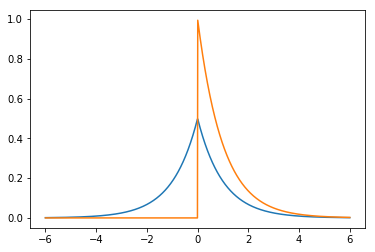

In [63]:
plt.plot(x, pdf)
plt.plot(x, pdf2)
#plt.hist(r, normed=True, histtype='bar',bins=30)
plt.show()

In [64]:
r = sts.expon.rvs(size=1000, scale=5)

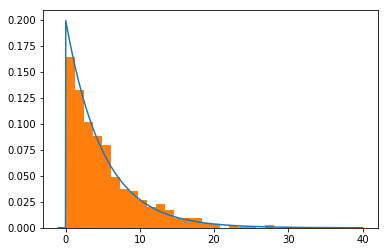

In [65]:
x = np.linspace(-1,40,1000)
pdf2 = sts.expon.pdf(x, scale=5)
plt.plot(x, pdf2)
plt.hist(r, normed=True, histtype='bar',bins=30)
plt.show()

In [66]:
means = []
for i in range(1000):
    choose = sts.expon.rvs(size=5, scale=5)
    #print(np.mean(choose))
    means.append(np.mean(choose))

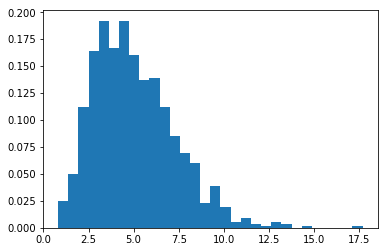

In [67]:
plt.hist(means, normed=True, histtype='bar',bins=30)
plt.show()

In [68]:
means = []
for i in range(1000):
    choose = sts.expon.rvs(size=10, scale=5)
    #print(np.mean(choose))
    means.append(np.mean(choose))

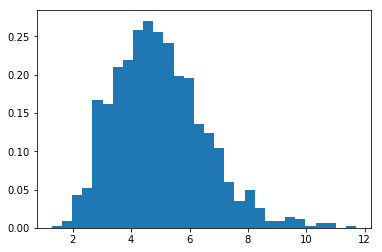

In [70]:
plt.hist(means, normed=True, histtype='bar',bins=30)
plt.show()

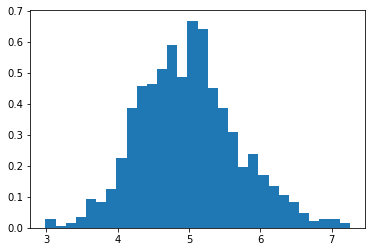

In [71]:
means = []
for i in range(1000):
    choose = sts.expon.rvs(size=50, scale=5)
    #print(np.mean(choose))
    means.append(np.mean(choose))
    
plt.hist(means, normed=True, histtype='bar',bins=30)
plt.show()

In [ ]:
from numpy import sin, exp, arange
f_x = lambda x: sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)

In [ ]:
x = arange(1, 30, 0.1)
y = f_x(x)
plt.plot(x, y)
plt.show()

In [72]:
mo = 5

In [73]:
sigma = 25

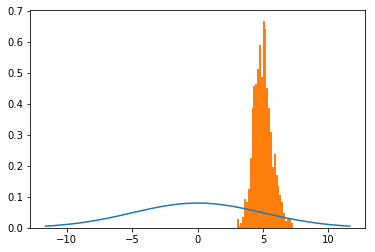

In [78]:
norm_rv = sts.norm(scale=5)
x = np.linspace(norm_rv.ppf(0.01),norm_rv.ppf(0.99),100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)
plt.hist(means, normed=True, histtype='bar',bins=30)
plt.show()